In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv('dataset/1429_1.csv')

# Display first few rows
print(df.columns)
df.head()

# Text Cleaning and Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isnull(text):
        return ''
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply cleaning to the 'reviews.text' column
if 'reviews.text' in df.columns:
    df['cleaned_text'] = df['reviews.text'].apply(clean_text)
else:
    print('Column reviews.text not found in DataFrame')

# Display cleaned text
print(df[['reviews.text', 'cleaned_text']].head())

C:\Users\Umer\AppData\Local\Temp\ipykernel_11824\1149119275.py:4: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/1429_1.csv')
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Umer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Umer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Umer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')
                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                                        cleaned_text  
0  product far disappointed child love use like a...  
1  great beginner experienced person bought gift ...  
2  inexpensive tablet use learn step nabi thrille...  
3  ive fire hd two week love tab

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

# To see the shape of the resulting matrix (rows: reviews, columns: unique words)
print(tfidf_matrix.shape)

# To see feature names (words)
print(vectorizer.get_feature_names_out()[:20])  # Show first 20 words

# If you want to convert it to a DataFrame for easier inspection:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())

(34660, 5000)
['abc' 'ability' 'able' 'absolute' 'absolutely' 'abundance' 'abuse' 'ac'
 'accent' 'accept' 'acceptable' 'access' 'accessed' 'accessibility'
 'accessible' 'accessing' 'accessory' 'accident' 'accidental'
 'accidentally']
   abc   ability      able  absolute  absolutely  abundance  abuse   ac  \
0  0.0  0.315374  0.000000       0.0         0.0        0.0    0.0  0.0   
1  0.0  0.000000  0.000000       0.0         0.0        0.0    0.0  0.0   
2  0.0  0.000000  0.000000       0.0         0.0        0.0    0.0  0.0   
3  0.0  0.000000  0.102577       0.0         0.0        0.0    0.0  0.0   
4  0.0  0.000000  0.000000       0.0         0.0        0.0    0.0  0.0   

   accent  accept  ...  youth  youtube  youve   yr  yrold  zero  zip  zone  \
0     0.0     0.0  ...    0.0      0.0    0.0  0.0    0.0   0.0  0.0   0.0   
1     0.0     0.0  ...    0.0      0.0    0.0  0.0    0.0   0.0  0.0   0.0   
2     0.0     0.0  ...    0.0      0.0    0.0  0.0    0.0   0.0  0.0   0.0   
3  

In [11]:
# Example: Create sentiment labels from ratings
def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['reviews.rating'].apply(get_sentiment)
print(df['sentiment'].value_counts())

sentiment
positive    32316
neutral      1499
negative      845
Name: count, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

# Use the sparse tfidf_matrix as X, and sentiment as y
X = tfidf_matrix
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Naive Bayes Results:
              precision    recall  f1-score   support

    negative       1.00      0.01      0.01       169
     neutral       0.50      0.01      0.01       300
    positive       0.93      1.00      0.97      6463

    accuracy                           0.93      6932
   macro avg       0.81      0.34      0.33      6932
weighted avg       0.92      0.93      0.90      6932

Accuracy: 0.9326312752452395
Logistic Regression Results:
              precision    recall  f1-score   support

    negative       0.61      0.14      0.22       169
     neutral       0.40      0.04      0.07       300
    positive       0.94      1.00      0.97      6463

    accuracy                           0.93      6932
   macro avg       0.65      0.39      0.42      6932
weighted avg       0.91      0.93      0.91      6932

Accuracy: 0.934939411425274


In [18]:
# Logistic Regression with balanced class weights cuz positive class is less than negative class
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression with balanced class weights Results:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression with balanced class weights Results:
              precision    recall  f1-score   support

    negative       0.21      0.53      0.30       169
     neutral       0.13      0.44      0.20       300
    positive       0.98      0.83      0.90      6463

    accuracy                           0.81      6932
   macro avg       0.44      0.60      0.47      6932
weighted avg       0.92      0.81      0.85      6932

Accuracy: 0.805395268320831


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    if pd.isnull(text):
        return 'neutral'
    score = analyzer.polarity_scores(str(text))['compound'] #using compund of all positive negative
    if score >= 0.5:
        return 'positive'
    elif score <= -0.5:
        return 'negative'
    else:
        return 'neutral'

# Apply to the test set (use the same indices as your classical model test set)
vader_preds = df.loc[y_test.index, 'reviews.text'].apply(vader_sentiment)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score

print("VADER Results:")
print(classification_report(y_test, vader_preds))
print("Accuracy:", accuracy_score(y_test, vader_preds))

VADER Results:
              precision    recall  f1-score   support

    negative       0.27      0.18      0.21       169
     neutral       0.09      0.46      0.15       300
    positive       0.96      0.79      0.87      6463

    accuracy                           0.76      6932
   macro avg       0.44      0.47      0.41      6932
weighted avg       0.91      0.76      0.82      6932

Accuracy: 0.759665320253895


In [ ]:
from textblob import TextBlob

def textblob_sentiment(text):
    if pd.isnull(text):
        return 'neutral'
    polarity = TextBlob(str(text)).sentiment.polarity  #using polarity here, not subjectivity
    if polarity >= 0.5:
        return 'positive'
    elif polarity <= -0.5:
        return 'negative'
    else:
        return 'neutral'

# Apply to the test set (use the same indices as your classical model test set)
textblob_preds = df.loc[y_test.index, 'reviews.text'].apply(textblob_sentiment)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score

print("TextBlob Results:")
print(classification_report(y_test, textblob_preds))
print("Accuracy:", accuracy_score(y_test, textblob_preds))

TextBlob Results:
              precision    recall  f1-score   support

    negative       0.18      0.02      0.04       169
     neutral       0.06      0.87      0.11       300
    positive       0.98      0.34      0.51      6463

    accuracy                           0.36      6932
   macro avg       0.41      0.41      0.22      6932
weighted avg       0.92      0.36      0.48      6932

Accuracy: 0.3558857472590883


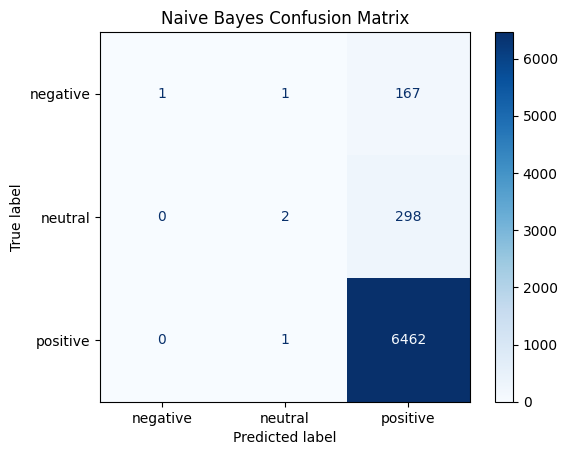

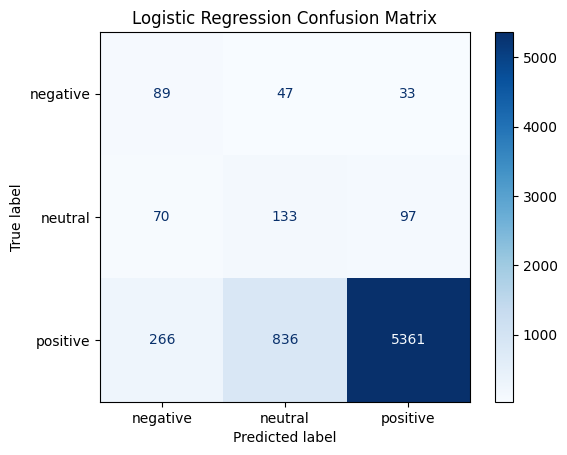

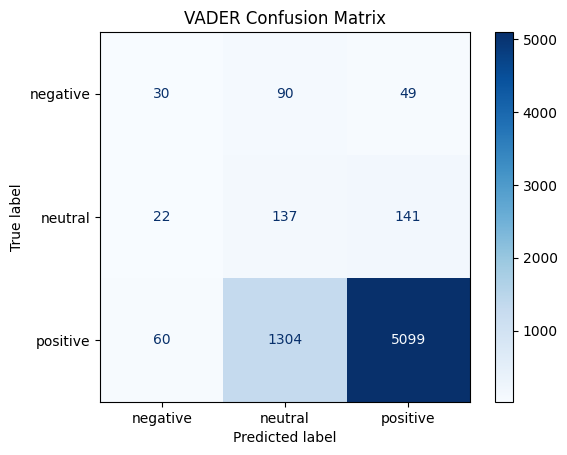

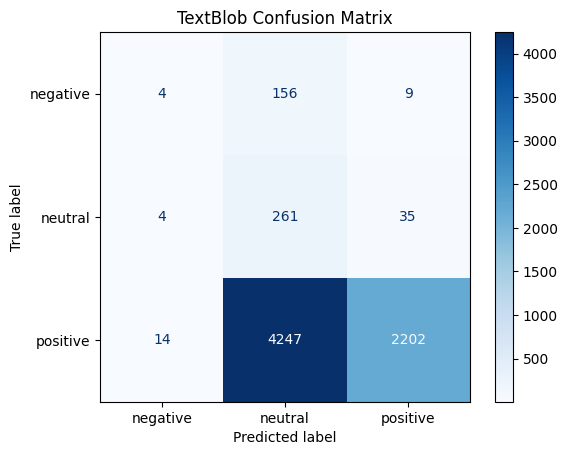

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=['negative', 'neutral', 'positive'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'neutral', 'positive'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Naive Bayes
plot_confusion(y_test, y_pred_nb, "Naive Bayes Confusion Matrix")

# Logistic Regression
plot_confusion(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")

# VADER
plot_confusion(y_test, vader_preds, "VADER Confusion Matrix")

# TextBlob
plot_confusion(y_test, textblob_preds, "TextBlob Confusion Matrix")